Notebook motivation


In [1]:
import time
import copy
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

from imblearn.over_sampling import RandomOverSampler

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

import xgboost as xgb
from xgboost import XGBClassifier

from bayes_opt import BayesianOptimization

In [2]:
df = pd.read_csv("./redwine-quality/winequality-red.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [3]:
print(df.isna().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [4]:
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [5]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
#1 - Poor
#2 - Good
#3 - Excellent
marks = []
for i in df['quality']:
    if i < 5:
        marks.append(1)
    elif i >= 5 and i < 8:
        marks.append(2)
    elif i >= 8:
        marks.append(3)
df['mark'] = marks
df = df.drop('quality', axis=1)

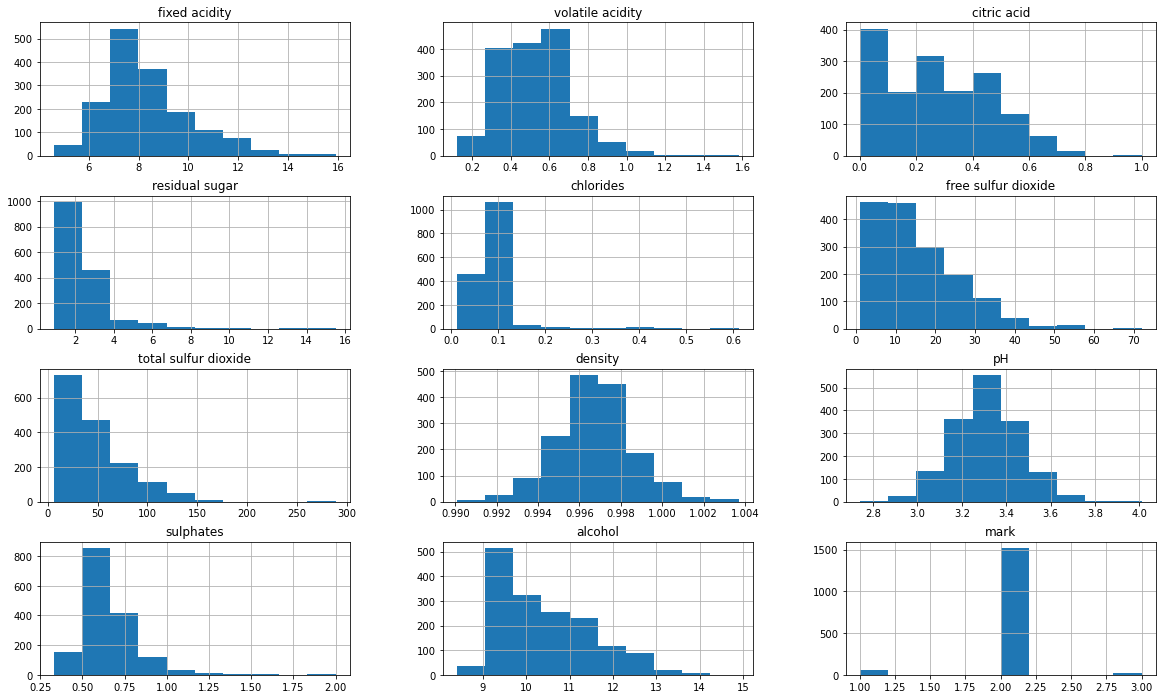

In [7]:
df.hist(figsize=(20,12));

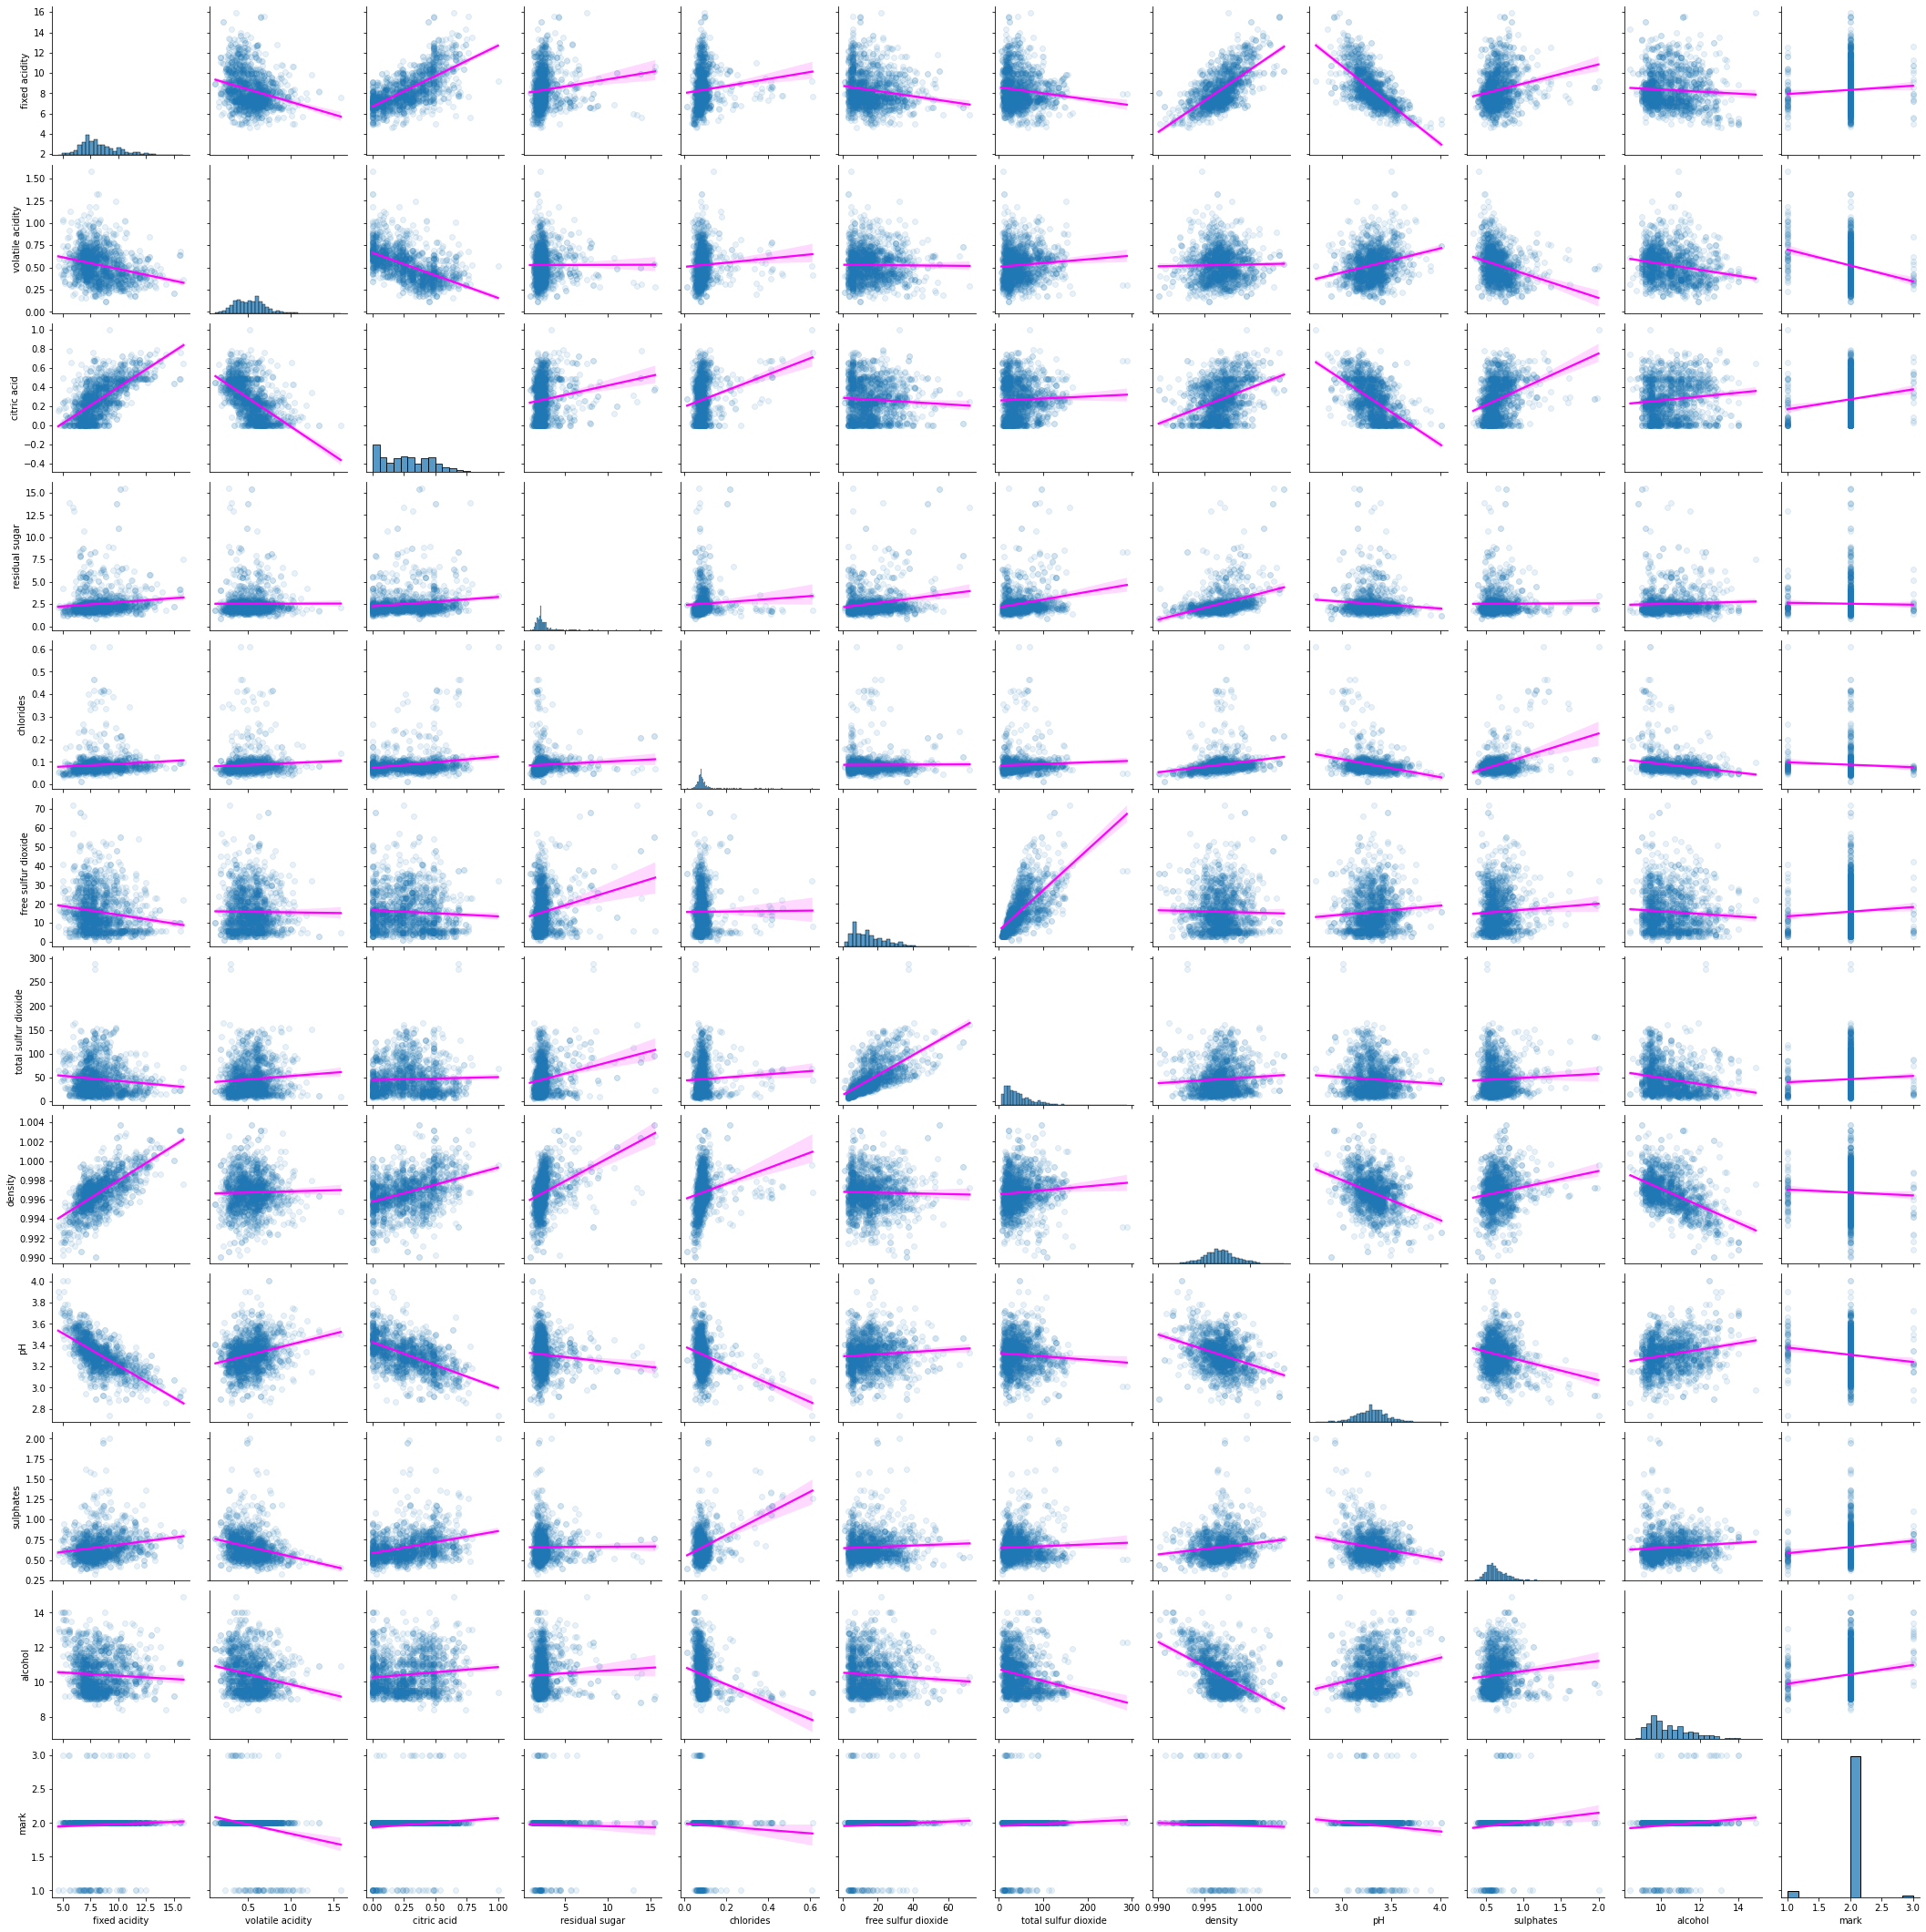

Elapsed time: 35.61


In [8]:
# pairwise scatter plot and histograms
t1 = time.time()
sns.pairplot(df,kind='reg', 
             plot_kws={'line_kws':{'color':'magenta'},
                       'scatter_kws': {'alpha': 0.1}})
plt.show()
t2 = time.time()
print('Elapsed time:', np.round(t2-t1,2))

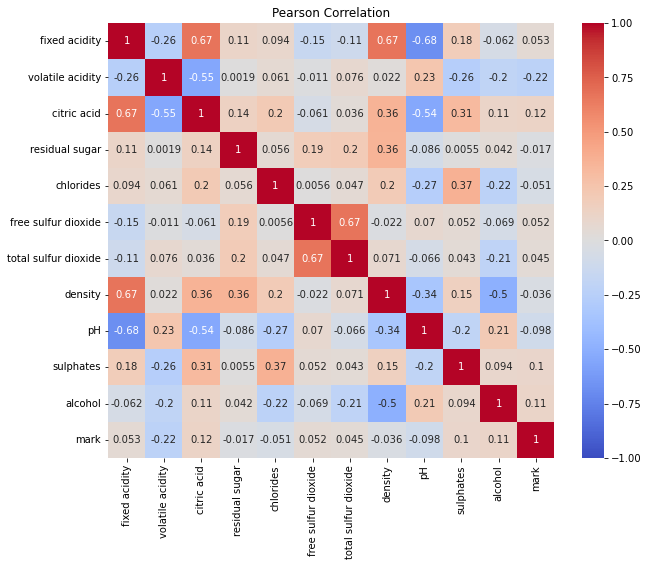

In [9]:
# correlations
corr_pearson = df.corr(method='pearson')

fig = plt.figure(figsize = (10,8))
sns.heatmap(corr_pearson, annot=True, cmap='coolwarm', vmin=-1, vmax=+1)
plt.title('Pearson Correlation')
plt.show();


In [11]:
x_raw = df.drop(['mark'],axis=1)
y_raw = df.mark

x_train_raw, x_test_raw, y_train_raw, y_test_raw = train_test_split(x_raw, y_raw, test_size = 0.3, random_state = 42, shuffle = True, stratify=y_raw)

y_train_raw = y_train_raw.values.reshape(-1,1)
y_test_raw = y_test_raw.values.reshape(-1,1)

print("x_train shape:",x_train_raw.shape)
print("y_train shape:",y_train_raw.shape)
print("x_test shape:",x_test_raw.shape)
print("y_test shape:",y_test_raw.shape)

x_train shape: (1119, 11)
y_train shape: (1119, 1)
x_test shape: (480, 11)
y_test shape: (480, 1)


In [12]:
x_train_os, y_train_os = RandomOverSampler().fit_resample(x_train_raw, y_train_raw)

In [13]:
print(np.unique(y_train_raw, return_counts=True))
print(np.unique(y_train_os, return_counts=True))
print("x_train_raw shape:",x_train_raw.shape)
print("x_train_os shape:",x_train_os.shape)

(array([1, 2, 3], dtype=int64), array([  44, 1062,   13], dtype=int64))
(array([1, 2, 3], dtype=int64), array([1062, 1062, 1062], dtype=int64))
x_train_raw shape: (1119, 11)
x_train_os shape: (3186, 11)


In [14]:
x_train = x_train_os
y_train = y_train_os

x_test = x_test_raw
y_test = y_test_raw

# Classification

In [15]:
#helper function for showing confusion matrix and classification report
def plot_confusion_matrix(estimator, X, y, normalize = None, show_report = True, title = None):

    y_pred = estimator.predict(X)
    cm = confusion_matrix(y, y_pred, normalize = normalize)
    
    if normalize == None:
        fmt =  'g'
    else:
        fmt = '.3%'
    
    ax = sns.heatmap(cm, annot=True, cmap='Blues', fmt=fmt)

    ax.set_title('Confusion Matrix\n' + title);
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ');

    plt.show();
    
    if show_report:
        print(classification_report(y, y_pred, digits=3))

In [16]:
# dictionary for storing results of models
result_train = {}
result_test = {}


## Knn classifier

### KNN simple

Train Score: 0.960450879170091
Test Score: 0.875


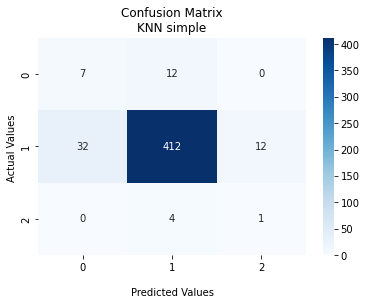

              precision    recall  f1-score   support

           1      0.179     0.368     0.241        19
           2      0.963     0.904     0.932       456
           3      0.077     0.200     0.111         5

    accuracy                          0.875       480
   macro avg      0.406     0.491     0.428       480
weighted avg      0.922     0.875     0.896       480



In [17]:
knn = Pipeline(steps=[('scaler', StandardScaler()), ('knn', KNeighborsClassifier(n_jobs=-1))])

accuracies = cross_val_score(knn, x_train, y_train, cv=5)
knn.fit(x_train,y_train)

result_train['KNN Train score'] = np.mean(accuracies)
result_test['KNN Test score'] = knn.score(x_test,y_test)

print("Train Score:",result_train['KNN Train score'])
print("Test Score:",result_test['KNN Test score'])

y_pred = knn.predict(x_test)
plot_confusion_matrix(knn, x_test, y_test, normalize = None, title = "KNN simple")

### KNN GridSerachCV opt

Train Score (Cross val): 0.9682977121400766
Test Score: 0.88125
Hyperparameters: {'knn__n_neighbors': 5, 'knn__p': 1, 'knn__weights': 'distance'}


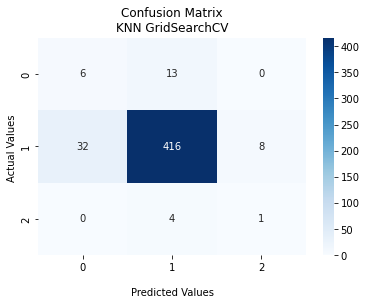

              precision    recall  f1-score   support

           1      0.158     0.316     0.211        19
           2      0.961     0.912     0.936       456
           3      0.111     0.200     0.143         5

    accuracy                          0.881       480
   macro avg      0.410     0.476     0.430       480
weighted avg      0.920     0.881     0.899       480



In [18]:
grid = {'knn__n_neighbors':np.arange(5,100),
        'knn__p':np.arange(1,2),
        'knn__weights':['uniform','distance']
       }

knn_cv = GridSearchCV(Pipeline(steps=[('scaler', StandardScaler()), ('knn', KNeighborsClassifier(n_jobs=-1))]), grid, cv=5, n_jobs = -1)
knn_cv.fit(x_train,y_train)

result_train['KNN GridSearchCV Train Score (Cross val)'] = knn_cv.best_score_
result_test['KNN GridSearchCV Test Score'] = knn_cv.score(x_test,y_test)

print("Train Score (Cross val):", result_train['KNN GridSearchCV Train Score (Cross val)'])
print("Test Score:", result_test['KNN GridSearchCV Test Score'])
print("Hyperparameters:", knn_cv.best_params_)

plot_confusion_matrix(knn_cv, x_test, y_test, normalize = None, title = 'KNN GridSearchCV')

### KNN Bayes opt

In [19]:
knn_weights = ['uniform','distance']

In [20]:
def bo_params_knn(n_neighbors,p,weights):   
    params = {
        'n_neighbors': int(np.round(n_neighbors)),
        'p':p,
        'weights':knn_weights[int(weights)]
    }
    
    #print(params)
    
    clf = Pipeline(
        steps=[
            ('scaler', StandardScaler()),
            ('knn', KNeighborsClassifier(
                n_jobs=-1,
                n_neighbors=params['n_neighbors'],
                p=params['p'],
                weights=params['weights']
            ))
        ]
    )
    
    score_train = np.mean(cross_val_score(clf, x_train, y_train, cv=5))
    
    clf.fit(x_train,y_train)
    #score_train = clf.score(x_train,y_train) 
    score_test = clf.score(x_test,y_test)
    score = score_train + score_test
    
    return score

In [22]:
knn_optimizer = BayesianOptimization(
    f = bo_params_knn,
    pbounds = {
        'n_neighbors':[5,100],
        'p':[1,2],
        'weights':[0,len(knn_weights)-1]
    },
    verbose = 2
)

In [23]:
knn_optim_results = knn_optimizer.maximize(n_iter=100,init_points=20,acq='ucb')

|   iter    |  target   | n_neig... |     p     |  weights  |
-------------------------------------------------------------
|  1        |  1.405    |  59.75    |  1.061    |  0.8057   |
|  2        |  1.682    |  13.51    |  1.56     |  0.05176  |
|  3        |  1.551    |  22.54    |  1.463    |  0.6594   |
|  4        |  1.368    |  45.94    |  1.646    |  0.1361   |
|  5        |  1.348    |  67.69    |  1.833    |  0.8416   |
|  6        |  1.486    |  28.69    |  1.39     |  0.5921   |
|  7        |  1.281    |  90.95    |  1.35     |  0.8925   |
|  8        |  1.321    |  77.39    |  1.889    |  0.6357   |
|  9        |  1.289    |  80.09    |  1.975    |  0.008188 |
|  10       |  1.53     |  25.27    |  1.636    |  0.2165   |
|  11       |  1.394    |  64.01    |  1.665    |  0.8974   |
|  12       |  1.271    |  95.95    |  1.057    |  0.1906   |
|  13       |  1.418    |  51.5     |  1.932    |  0.8822   |
|  14       |  1.289    |  84.5     |  1.626    |  0.3229   |
|  15   

In [24]:
print(knn_optimizer.max)

knn_bo_hyperparams = {}
knn_bo_hyperparams['n_neighbors'] = int(np.round(knn_optimizer.max['params']['n_neighbors']))
knn_bo_hyperparams['p'] = knn_optimizer.max['params']['p']
knn_bo_hyperparams['weights'] = knn_weights[int(knn_optimizer.max['params']['weights'])]

print(knn_bo_hyperparams)

{'target': 1.8601643738035363, 'params': {'n_neighbors': 5.167275225876477, 'p': 2.0, 'weights': 1.0}}
{'n_neighbors': 5, 'p': 2.0, 'weights': 'distance'}


Train Score (Cross val): 0.9664143738035363
Train Score: 1.0
Test Score: 0.89375
Hyperparameters: {'n_neighbors': 5, 'p': 2.0, 'weights': 'distance'}


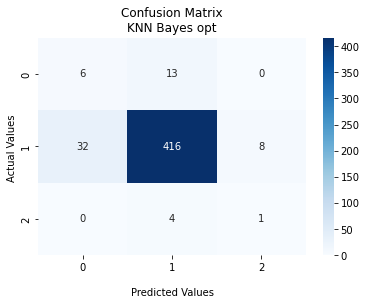

              precision    recall  f1-score   support

           1      0.158     0.316     0.211        19
           2      0.961     0.912     0.936       456
           3      0.111     0.200     0.143         5

    accuracy                          0.881       480
   macro avg      0.410     0.476     0.430       480
weighted avg      0.920     0.881     0.899       480



In [25]:

knn_bo = Pipeline(
        steps = [
            ('scaler', StandardScaler()),
            ('knn', KNeighborsClassifier(
                n_jobs = -1,
                n_neighbors = knn_bo_hyperparams['n_neighbors'],
                p = knn_bo_hyperparams['p'],
                weights = knn_bo_hyperparams['weights']
            ))
        ]
    )

knn_bo_accuracies = cross_val_score(knn_bo, x_train, y_train, cv=5)
knn_bo.fit(x_train,y_train)

result_train['KNN BayesOpt Train Score (Cross val)'] = np.mean(knn_bo_accuracies)
result_train['KNN BayesOpt Train Score'] = knn_bo.score(x_train,y_train)
result_test['KNN BayesOpt Test Score'] = knn_bo.score(x_test,y_test)

print("Train Score (Cross val):", result_train['KNN BayesOpt Train Score (Cross val)'])
print("Train Score:", result_train['KNN BayesOpt Train Score'])
print("Test Score:", result_test['KNN BayesOpt Test Score'])
print("Hyperparameters:", knn_bo_hyperparams)

plot_confusion_matrix(knn_cv, x_test, y_test, normalize = None, title = 'KNN Bayes opt')

## XGBOOST classifier

In [26]:
import xgboost as xgb
from xgboost import XGBClassifier

Train Score: 1.0
Test Score: 0.9416666666666667


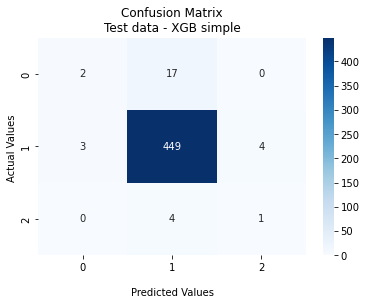

              precision    recall  f1-score   support

           1      0.400     0.105     0.167        19
           2      0.955     0.985     0.970       456
           3      0.200     0.200     0.200         5

    accuracy                          0.942       480
   macro avg      0.518     0.430     0.445       480
weighted avg      0.925     0.942     0.930       480



In [28]:
xgbc = XGBClassifier(objective='multi:softmax',eval_metric= 'logloss', n_jobs=-1)
xgbc.fit(x_train, y_train)

result_train['XBC simple Train Score'] = xgbc.score(x_train, y_train)
result_test['XBC simple Test Score'] = xgbc.score(x_test, y_test)

print("Train Score:", result_train['XBC simple Train Score'] )
print("Test Score:", result_test['XBC simple Test Score'] )


plot_confusion_matrix(xgbc, x_test, y_test, normalize = None, title = 'Test data - XGB simple')

In [29]:
xgbc.feature_importances_

array([0.03647724, 0.07042408, 0.05974031, 0.08704469, 0.05583619,
       0.07543486, 0.06234159, 0.03297506, 0.09262624, 0.25730178,
       0.16979784], dtype=float32)

### XGB GridSearchCV opt

In [30]:
grid_xgb = {
    "subsample":[0.5, 0.75, 1],
    "colsample_bytree":[0.5, 0.75, 1],
    "max_depth":[2, 6, 12],
    "min_child_weight":[1,5,15],
    "learning_rate":[0.3, 0.1, 0.03],
    "n_estimators":[3, 10, 50, 100, 300]
}

model_gs = GridSearchCV(
    xgb.XGBClassifier(objective='multi:softmax', eval_metric='logloss', n_jobs=-1),
    param_grid=grid_xgb, cv=3, scoring="accuracy", verbose=True)
model_gs.fit(x_train,y_train)

print(model_gs.best_params_)

print(model_gs.score(x_train, y_train))
print(model_gs.score(x_test, y_test))

Fitting 3 folds for each of 1215 candidates, totalling 3645 fits
{'colsample_bytree': 0.5, 'learning_rate': 0.1, 'max_depth': 12, 'min_child_weight': 1, 'n_estimators': 50, 'subsample': 1}
1.0
0.94375


Train Score (Cross val): 0.9946641556811048
Train Score: 1.0
Test Score: 0.94375
Hyperparameters: {'colsample_bytree': 0.5, 'learning_rate': 0.1, 'max_depth': 12, 'min_child_weight': 1, 'n_estimators': 50, 'subsample': 1}


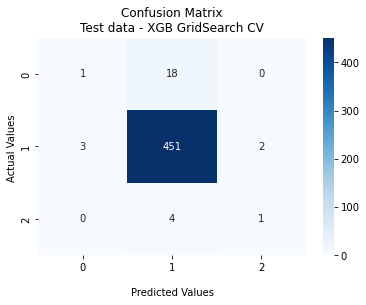

              precision    recall  f1-score   support

           1      0.250     0.053     0.087        19
           2      0.953     0.989     0.971       456
           3      0.333     0.200     0.250         5

    accuracy                          0.944       480
   macro avg      0.512     0.414     0.436       480
weighted avg      0.919     0.944     0.928       480



In [31]:
#result_train['XGB GridSearchCV Train Score'] = np.mean(cross_val_score(model_gs, x_train, y_train, cv=3))

result_train['XGB GridSearchCV Train Score (Cross val)'] = model_gs.best_score_
result_train['XGB GridSearchCV Train Score'] = model_gs.score(x_train,y_train)
result_test['XGB GridSearchCV Test Score'] = model_gs.score(x_test,y_test)

print("Train Score (Cross val):", result_train['XGB GridSearchCV Train Score (Cross val)'])
print("Train Score:", result_train['XGB GridSearchCV Train Score'])
print("Test Score:", result_test['XGB GridSearchCV Test Score'])
print("Hyperparameters:",model_gs.best_params_)

plot_confusion_matrix(model_gs, x_test, y_test, normalize = None, title = 'Test data - XGB GridSearch CV')

### XGB Bayes opt

In [32]:
def bo_params_xgb(
    subsample,
    colsample_bytree,
    max_depth,
    min_child_weight,
    learning_rate,
    n_estimators
    ):   
    params = {
        'subsample': subsample,
        'colsample_bytree': colsample_bytree,
        'max_depth': int(np.round(max_depth)),
        'min_child_weight': min_child_weight,       
        'learning_rate':learning_rate,
        'n_estimators': int(np.round(n_estimators))
    }
    
    #print(params)
    
    clf = XGBClassifier(
        subsample = params['subsample'],
        colsample_bytree=params['colsample_bytree'],
        max_depth=params['max_depth'],
        min_child_weight=params['min_child_weight'],
        learning_rate=params['learning_rate'],
        n_estimators=params['n_estimators'],
        
        objective='multi:softmax',
        eval_metric='logloss',
        random_state=42,
        n_jobs = -1
    )
    
    score_train = np.mean(cross_val_score(clf, x_train, y_train, cv=5))
    
    clf.fit(x_train,y_train)
    #score_train = clf.score(x_train,y_train) 
    score_test = clf.score(x_test,y_test)
    score = score_train + score_test
    
    return score

In [33]:
xgb_optimizer=BayesianOptimization(
    f=bo_params_xgb,
    pbounds={
        "subsample":[0.5, 1],
        "colsample_bytree":[0.5, 1],
        "max_depth":[2, 12],
        "min_child_weight":[1,  15],
        "learning_rate":[0.01, 0.5],
        "n_estimators":[3, 300]
    },
    verbose=2
)

In [34]:
xgb_optim_results = xgb_optimizer.maximize(n_iter=100,init_points=20,acq='ucb')

|   iter    |  target   | colsam... | learni... | max_depth | min_ch... | n_esti... | subsample |
-------------------------------------------------------------------------------------------------
|  1        |  1.934    |  0.8849   |  0.2423   |  11.64    |  5.106    |  271.2    |  0.861    |
|  2        |  1.905    |  0.7601   |  0.3859   |  4.374    |  13.5     |  120.5    |  0.6877   |
|  3        |  1.927    |  0.8768   |  0.3376   |  5.643    |  12.02    |  270.7    |  0.8043   |
|  4        |  1.924    |  0.8041   |  0.3733   |  3.036    |  13.78    |  202.6    |  0.9969   |
|  5        |  1.931    |  0.9646   |  0.4337   |  8.153    |  2.497    |  141.3    |  0.6376   |
|  6        |  1.931    |  0.9018   |  0.4553   |  5.464    |  3.822    |  259.7    |  0.5966   |
|  7        |  1.92     |  0.509    |  0.4627   |  2.888    |  13.01    |  98.33    |  0.5591   |
|  8        |  1.928    |  0.8046   |  0.497    |  4.826    |  6.067    |  297.1    |  0.6167   |
|  9        |  1.931

In [37]:
print(xgb_optimizer.max)

{'target': 1.9483166566602526, 'params': {'colsample_bytree': 0.5, 'learning_rate': 0.5, 'max_depth': 12.0, 'min_child_weight': 1.0, 'n_estimators': 227.822454831515, 'subsample': 0.7881093161797518}}


In [38]:
xgb_bo_hyperparams = {}
xgb_bo_hyperparams['subsample'] = xgb_optimizer.max['params']['subsample']
xgb_bo_hyperparams['colsample_bytree'] = xgb_optimizer.max['params']['colsample_bytree']
xgb_bo_hyperparams['max_depth'] = int(np.round(xgb_optimizer.max['params']['max_depth']))
xgb_bo_hyperparams['min_child_weight'] = xgb_optimizer.max['params']['min_child_weight']
xgb_bo_hyperparams['learning_rate'] = xgb_optimizer.max['params']['learning_rate']
xgb_bo_hyperparams['n_estimators'] = int(np.round(xgb_optimizer.max['params']['n_estimators']))

print(xgb_bo_hyperparams)

{'subsample': 0.7881093161797518, 'colsample_bytree': 0.5, 'max_depth': 12, 'min_child_weight': 1.0, 'learning_rate': 0.5, 'n_estimators': 228}


In [39]:
xgb_bo = XGBClassifier(
    subsample = xgb_bo_hyperparams['subsample'],
    colsample_bytree=xgb_bo_hyperparams['colsample_bytree'],
    max_depth=xgb_bo_hyperparams['max_depth'],
    min_child_weight=xgb_bo_hyperparams['min_child_weight'],
    learning_rate=xgb_bo_hyperparams['learning_rate'],
    n_estimators=xgb_bo_hyperparams['n_estimators'],
        
    objective='multi:softmax',
    eval_metric='logloss',
    random_state=42,
    n_jobs = -1
)


xgb_bo_accuracies = cross_val_score(xgb_bo, x_train, y_train, cv=5)
xgb_bo.fit(x_train,y_train)

result_train['XGB BayesOpt Train Score (Cross val)'] = np.mean(xgb_bo_accuracies)
result_train['XGB BayesOpt Train Score'] = xgb_bo.score(x_train,y_train)
result_test['XGB BayesOpt Test Score'] = xgb_bo.score(x_test,y_test)

Hyperparameters: {'subsample': 0.7881093161797518, 'colsample_bytree': 0.5, 'max_depth': 12, 'min_child_weight': 1.0, 'learning_rate': 0.5, 'n_estimators': 228}
Train Score (Cross val): 0.9962333233269194
Train Score: 1.0
Test Score: 0.9520833333333333


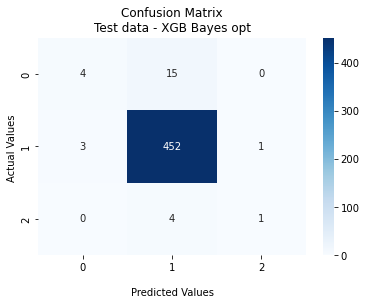

              precision    recall  f1-score   support

           1      0.571     0.211     0.308        19
           2      0.960     0.991     0.975       456
           3      0.500     0.200     0.286         5

    accuracy                          0.952       480
   macro avg      0.677     0.467     0.523       480
weighted avg      0.940     0.952     0.942       480



In [40]:
print("Hyperparameters:", xgb_bo_hyperparams)
print("Train Score (Cross val):", result_train['XGB BayesOpt Train Score (Cross val)'])
print("Train Score:", result_train['XGB BayesOpt Train Score'])
print("Test Score:", result_test['XGB BayesOpt Test Score'])

plot_confusion_matrix(xgb_bo, x_test, y_test, normalize = None, title = 'Test data - XGB Bayes opt')

# RandomForest classifier

### RF simple

In [41]:
rf = RandomForestClassifier(random_state = 42)

result_train['RF Train Score (Cross val)'] = np.mean(cross_val_score(rf, x_train, y_train, cv=5))

rf.fit(x_train,y_train)
result_train['RF Train Score'] = rf.score(x_train,y_train)
result_test['RF Test Score'] = rf.score(x_test,y_test)

Train Score (Cross val): 0.9974887181783731
Train Score: 1.0
Test Score: 0.9395833333333333


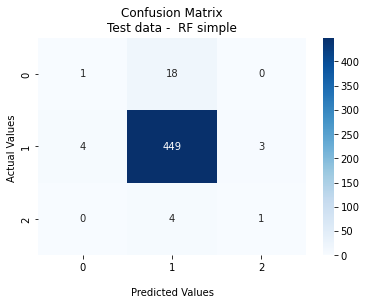

              precision    recall  f1-score   support

           1      0.200     0.053     0.083        19
           2      0.953     0.985     0.969       456
           3      0.250     0.200     0.222         5

    accuracy                          0.940       480
   macro avg      0.468     0.412     0.425       480
weighted avg      0.916     0.940     0.926       480



In [42]:
print("Train Score (Cross val):", result_train['RF Train Score (Cross val)'])
print("Train Score:", result_train['RF Train Score'])
print("Test Score:", result_test['RF Test Score'])

plot_confusion_matrix(rf, x_test, y_test, normalize = None, title = 'Test data -  RF simple')

### RF GridSearchCV opt

In [43]:
grid = {
    'n_estimators':np.arange(3,300,30),
    'criterion':['gini','entropy'],
    'max_depth': np.arange(1,30,1),
}

rf_cv = GridSearchCV(RandomForestClassifier(random_state=42), grid, cv=5, n_jobs=-1, scoring="accuracy", verbose=True)
rf_cv.fit(x_train,y_train)

result_train['RF GridSerachCV Train Score (Cross val)'] = rf_cv.best_score_

#result_train['RF GridSerachCV Train Score'] = np.mean(cross_val_score(rf_cv, x_train, y_train, cv=5))
result_train['RF GridSerachCV Train Score'] = rf_cv.score(x_train,y_train)
result_test['RF GridSerachCV Test Score'] = rf_cv.score(x_test,y_test)

Fitting 5 folds for each of 580 candidates, totalling 2900 fits


Train Score (Cross val): 0.9978026899209166
Train Score: 1.0
Test Score: 0.9395833333333333
Hyperparameters: {'criterion': 'gini', 'max_depth': 17, 'n_estimators': 123}


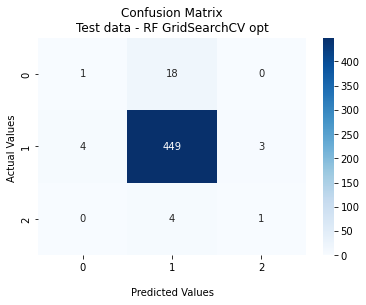

              precision    recall  f1-score   support

           1      0.200     0.053     0.083        19
           2      0.953     0.985     0.969       456
           3      0.250     0.200     0.222         5

    accuracy                          0.940       480
   macro avg      0.468     0.412     0.425       480
weighted avg      0.916     0.940     0.926       480



In [44]:
print("Train Score (Cross val):", result_train['RF GridSerachCV Train Score (Cross val)'])
print("Train Score:", result_train['RF GridSerachCV Train Score'])
print("Test Score:", result_test['RF GridSerachCV Test Score'])
print("Hyperparameters:",rf_cv.best_params_)

plot_confusion_matrix(rf_cv, x_test, y_test, normalize = None, title = 'Test data - RF GridSearchCV opt')

### RF bayes opt

In [45]:
rf_criterions = ['gini','entropy']

In [46]:
def bo_params_rf(
    n_estimators,
    criterion,
    max_depth,
    ccp_alpha):   
    params = {
        'n_estimators': int(np.round(n_estimators)),
        'criterion':rf_criterions[int(criterion)],
        'max_depth':int(np.round(max_depth)),
        'ccp_alpha':ccp_alpha
    }
    
    #print(params)
    
    clf = RandomForestClassifier(
        random_state=42,
        n_estimators=params['n_estimators'],
        criterion=params['criterion'],
        max_depth=params['max_depth'],
        ccp_alpha=params['ccp_alpha'],
        
        n_jobs = -1
    )
    
    score_train = np.mean(cross_val_score(clf, x_train, y_train, cv=5))
    
    clf.fit(x_train,y_train)
    #score_train = clf.score(x_train,y_train) 
    score_test = clf.score(x_test,y_test)
    score = score_train + score_test
    
    return score

In [47]:
rf_optimizer=BayesianOptimization(
    f=bo_params_rf,
    pbounds={
        'n_estimators':[3,1000],
        'criterion':[0,len(rf_criterions)-1],
        'max_depth':[1,100],        
        'ccp_alpha': [0.0, 0.9]
    },
    verbose=2
)

In [48]:
rf_optim_results = rf_optimizer.maximize(n_iter=100,init_points=20,acq='ucb')
print(rf_optimizer.max)

|   iter    |  target   | ccp_alpha | criterion | max_depth | n_esti... |
-------------------------------------------------------------------------
|  1        |  1.283    |  0.4704   |  0.9347   |  65.86    |  374.5    |
|  2        |  1.283    |  0.6695   |  0.1378   |  40.84    |  143.1    |
|  3        |  0.3723   |  0.2478   |  0.5415   |  73.06    |  518.9    |
|  4        |  0.3723   |  0.3411   |  0.379    |  60.62    |  569.3    |
|  5        |  0.3723   |  0.7421   |  0.98     |  42.13    |  579.2    |
|  6        |  0.3723   |  0.8392   |  0.6099   |  87.18    |  963.5    |
|  7        |  0.6467   |  0.1229   |  0.8658   |  12.69    |  626.0    |
|  8        |  1.283    |  0.835    |  0.559    |  87.2     |  462.2    |
|  9        |  0.3431   |  0.8694   |  0.8113   |  64.16    |  844.3    |
|  10       |  1.283    |  0.5486   |  0.276    |  41.63    |  109.8    |
|  11       |  0.3726   |  0.3422   |  0.4587   |  30.76    |  713.9    |
|  12       |  0.3723   |  0.6414   | 

In [49]:
rf_bo_hyperparams = {}
rf_bo_hyperparams['n_estimators'] = int(np.round(rf_optimizer.max['params']['n_estimators']))
rf_bo_hyperparams['criterion'] = rf_criterions[int(rf_optimizer.max['params']['criterion'])]
rf_bo_hyperparams['max_depth'] = int(np.round(rf_optimizer.max['params']['max_depth']))
rf_bo_hyperparams['ccp_alpha'] = rf_optimizer.max['params']['ccp_alpha']

print(rf_bo_hyperparams)

{'n_estimators': 256, 'criterion': 'entropy', 'max_depth': 100, 'ccp_alpha': 0.0}


In [50]:
rf_bo = RandomForestClassifier(
    random_state = 42,
    n_estimators = rf_bo_hyperparams['n_estimators'] ,
    criterion = rf_bo_hyperparams['criterion'],
    max_depth = rf_bo_hyperparams['max_depth'],
    ccp_alpha = rf_bo_hyperparams['ccp_alpha']
)
rf_bo_accuracies = cross_val_score(rf_bo, x_train, y_train, cv=5)
rf_bo.fit(x_train,y_train)

print(rf_bo.score(x_train,y_train))
print(rf_bo.score(x_test,y_test))

result_train['RF BayesOpt Train Score (Cross val)'] = np.mean(rf_bo_accuracies)
result_train['RF BayesOpt Train Score'] = rf_bo.score(x_train,y_train)
result_test['RF BayesOpt Test Score'] = rf_bo.score(x_test,y_test)

1.0
0.95


Hyperparameters: {'n_estimators': 256, 'criterion': 'entropy', 'max_depth': 100, 'ccp_alpha': 0.0}
Train Score (Cross val): 0.9978026899209166
Train Score: 1.0
Test Score: 0.95


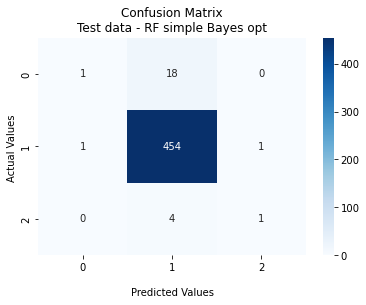

              precision    recall  f1-score   support

           1      0.500     0.053     0.095        19
           2      0.954     0.996     0.974       456
           3      0.500     0.200     0.286         5

    accuracy                          0.950       480
   macro avg      0.651     0.416     0.452       480
weighted avg      0.931     0.950     0.932       480



In [51]:
print("Hyperparameters:", rf_bo_hyperparams)
print("Train Score (Cross val):", result_train['RF BayesOpt Train Score (Cross val)'])
print("Train Score:", result_train['RF BayesOpt Train Score'])
print("Test Score:", result_test['RF BayesOpt Test Score'])

plot_confusion_matrix(rf_bo, x_test, y_test, normalize = None, title = 'Test data - RF simple Bayes opt')

# SVM classifier

In [52]:
svm_kernels = ["poly","rbf","sigmoid"]
def svm_kernel_index(kernel_number):
    return int(np.clip(np.round(kernel_number),0,len(svm_kernels)))
    

### SVM simple

In [53]:
#svc = SVC(random_state=1)
svc = Pipeline(steps=[('scaler', StandardScaler()), ('svc', SVC(random_state=42))])
svc.fit(x_train,y_train)

result_train['SVM Train Score (Cross val)'] = np.mean(cross_val_score(svc, x_train, y_train, cv=5))
result_train['SVM Train Score'] = svc.score(x_train,y_train)
result_test['SVM Test Score'] = svc.score(x_test,y_test)


Train Score (Cross val): 0.9205897550725137
Train Score: 0.9394224733207784
Test Score: 0.8354166666666667


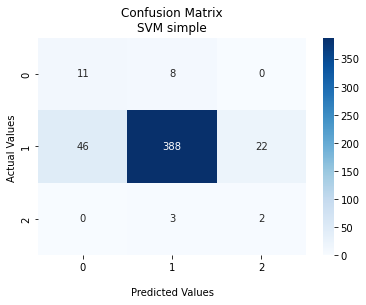

              precision    recall  f1-score   support

           1      0.193     0.579     0.289        19
           2      0.972     0.851     0.908       456
           3      0.083     0.400     0.138         5

    accuracy                          0.835       480
   macro avg      0.416     0.610     0.445       480
weighted avg      0.932     0.835     0.875       480



In [54]:
print("Train Score (Cross val):", result_train['SVM Train Score (Cross val)'])
print("Train Score:", result_train['SVM Train Score'])
print("Test Score:", result_test['SVM Test Score'])

plot_confusion_matrix(svc, x_test, y_test, normalize = None, title = 'SVM simple')

### SVM GridSerachCV opt

In [55]:
grid = {
    'svc__C':[0.01,0.1,1,2],
    'svc__kernel' : svm_kernels,
    'svc__degree' : [1,3,5,7],
    'svc__gamma' : [0.01,2]
}

svc_cv = GridSearchCV(Pipeline(steps=[('scaler', StandardScaler()), ('svc', SVC(random_state=42))]), grid, cv=5, n_jobs=-1, scoring="accuracy", verbose=True)
svc_cv.fit(x_train,y_train)

result_train['SVM GridSerachCV Train Score (Cross val)'] = svc_cv.best_score_
result_train['SVM GridSerachCV Train Score'] = svc_cv.score(x_train,y_train)
result_test['SVM GridSerachCV Test Score'] = svc_cv.score(x_test,y_test)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


Train Score (Cross val): 0.998430141287284
Train Score: 0.9993722536095417
Test Score: 0.95
Hyperparameters: {'svc__C': 1, 'svc__degree': 1, 'svc__gamma': 2, 'svc__kernel': 'rbf'}


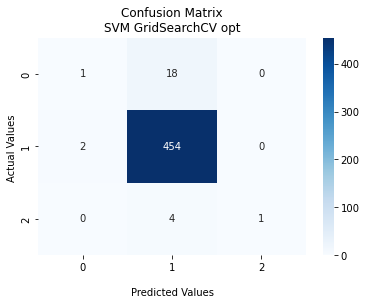

              precision    recall  f1-score   support

           1      0.333     0.053     0.091        19
           2      0.954     0.996     0.974       456
           3      1.000     0.200     0.333         5

    accuracy                          0.950       480
   macro avg      0.762     0.416     0.466       480
weighted avg      0.930     0.950     0.933       480



In [56]:
print("Train Score (Cross val):", result_train['SVM GridSerachCV Train Score (Cross val)'])
print("Train Score:", result_train['SVM GridSerachCV Train Score'])
print("Test Score:", result_test['SVM GridSerachCV Test Score'])
print("Hyperparameters:",svc_cv.best_params_)

plot_confusion_matrix(svc_cv, x_test, y_test, normalize = None, title = 'SVM GridSearchCV opt')

### SVM bayes opt

In [57]:
def bo_params_svm(C,kernel_number,degree,gamma):   
    params = {
        'C': C,
        'kernel':svm_kernels[int(kernel_number)],
        'degree':int(np.round(degree)),
        'gamma':gamma
    }
    
    #print(params)
    
    clf = Pipeline(
        steps=[
            ('scaler', StandardScaler()),
            ('svc', SVC(
                random_state=42,
                C=params['C'],
                kernel=params['kernel'],
                degree=params['degree'],
                gamma=params['gamma']
            ))
        ]
    )
        
    score_train = np.mean(cross_val_score(clf, x_train, y_train, cv=5))
    
    clf.fit(x_train,y_train)
    #score_train = clf.score(x_train,y_train) 
    score_test = clf.score(x_test,y_test)
    score = score_train + score_test
    
    return score

In [58]:
svm_optimizer = BayesianOptimization(f=bo_params_svm,
                             pbounds={
                                 'C':[0.01,2],
                                 'kernel_number':[0,2],
                                 'degree':[1,7],
                                 'gamma': [0.01,2]
                             },
                             verbose=2
                             )

In [59]:
svm_optim_results = svm_optimizer.maximize(n_iter=100, init_points=20, acq='ucb')

|   iter    |  target   |     C     |  degree   |   gamma   | kernel... |
-------------------------------------------------------------------------
|  1        |  1.448    |  0.3844   |  2.238    |  0.05759  |  0.4204   |
|  2        |  1.878    |  1.038    |  3.778    |  1.5      |  0.5332   |
|  3        |  1.405    |  0.8829   |  1.47     |  0.9775   |  0.1738   |
|  4        |  1.948    |  0.1536   |  6.498    |  1.916    |  1.817    |
|  5        |  1.852    |  0.5966   |  1.782    |  0.2208   |  1.279    |
|  6        |  1.888    |  1.685    |  5.596    |  0.7584   |  0.6117   |
|  7        |  1.944    |  1.47     |  2.841    |  0.916    |  1.857    |
|  8        |  1.876    |  0.6375   |  3.555    |  0.5476   |  0.1898   |
|  9        |  1.845    |  0.3636   |  3.055    |  1.072    |  0.7748   |
|  10       |  1.883    |  0.3416   |  3.622    |  0.9578   |  0.3549   |
|  11       |  1.845    |  0.09695  |  3.231    |  1.784    |  0.4992   |
|  12       |  1.648    |  1.134    | 

In [60]:
print(svm_optimizer.max)

svm_bo_hyperparams = {}
svm_bo_hyperparams['C'] = svm_optimizer.max['params']['C']
svm_bo_hyperparams['degree'] = int(np.round(svm_optimizer.max['params']['degree']))
svm_bo_hyperparams['gamma'] = svm_optimizer.max['params']['gamma'],
svm_bo_hyperparams['kernel'] = svm_kernels[int(svm_optimizer.max['params']['kernel_number'])]

print(svm_bo_hyperparams)

{'target': 1.9505134746206174, 'params': {'C': 1.215652869726971, 'degree': 6.169082291331573, 'gamma': 2.0, 'kernel_number': 1.3827243618132703}}
{'C': 1.215652869726971, 'degree': 6, 'gamma': (2.0,), 'kernel': 'rbf'}


In [61]:
svc_bo = Pipeline(
        steps = [
            ('scaler', StandardScaler()),
            ('svc',SVC(
                random_state=42,
                C=svm_optimizer.max['params']['C'],
                degree=int(np.round(svm_optimizer.max['params']['degree'])),
                gamma=svm_optimizer.max['params']['gamma'],
                kernel=svm_kernels[int(svm_optimizer.max['params']['kernel_number'])]
            ))
        ]
    )


svc_bo_accuracies = cross_val_score(svc_bo, x_train, y_train, cv=5)
svc_bo.fit(x_train,y_train)

result_train['SVM BayesOpt Train Score (Cross val)'] = np.mean(svc_bo_accuracies)
result_train['SVM BayesOpt Train Score'] = svc_bo.score(x_train,y_train)
result_test['SVM BayesOpt Test Score'] = svc_bo.score(x_test,y_test)

Train Score (Cross val): 0.998430141287284
Train Score: 0.9993722536095417
Test Score: 0.9520833333333333
Hyperparameters: {'C': 1.215652869726971, 'degree': 6, 'gamma': (2.0,), 'kernel': 'rbf'}


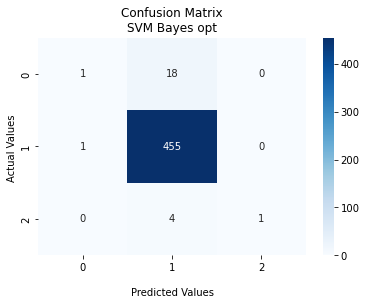

              precision    recall  f1-score   support

           1      0.500     0.053     0.095        19
           2      0.954     0.998     0.975       456
           3      1.000     0.200     0.333         5

    accuracy                          0.952       480
   macro avg      0.818     0.417     0.468       480
weighted avg      0.936     0.952     0.934       480



In [62]:
print("Train Score (Cross val):", result_train['SVM BayesOpt Train Score (Cross val)'])
print("Train Score:", result_train['SVM BayesOpt Train Score'])
print("Test Score:", result_test['SVM BayesOpt Test Score'])
print("Hyperparameters:", svm_bo_hyperparams)

plot_confusion_matrix(svc_bo, x_test, y_test, normalize = None, title = 'SVM Bayes opt')

In [63]:
result_train

{'KNN Train score': 0.960450879170091,
 'KNN GridSearchCV Train Score (Cross val)': 0.9682977121400766,
 'KNN BayesOpt Train Score (Cross val)': 0.9664143738035363,
 'KNN BayesOpt Train Score': 1.0,
 'XBC simple Train Score': 1.0,
 'XGB GridSearchCV Train Score (Cross val)': 0.9946641556811048,
 'XGB GridSearchCV Train Score': 1.0,
 'XGB BayesOpt Train Score (Cross val)': 0.9962333233269194,
 'XGB BayesOpt Train Score': 1.0,
 'RF Train Score (Cross val)': 0.9974887181783731,
 'RF Train Score': 1.0,
 'RF GridSerachCV Train Score (Cross val)': 0.9978026899209166,
 'RF GridSerachCV Train Score': 1.0,
 'RF BayesOpt Train Score (Cross val)': 0.9978026899209166,
 'RF BayesOpt Train Score': 1.0,
 'SVM Train Score (Cross val)': 0.9205897550725137,
 'SVM Train Score': 0.9394224733207784,
 'SVM GridSerachCV Train Score (Cross val)': 0.998430141287284,
 'SVM GridSerachCV Train Score': 0.9993722536095417,
 'SVM BayesOpt Train Score (Cross val)': 0.998430141287284,
 'SVM BayesOpt Train Score': 0.99

In [64]:
result_test

{'KNN Test score': 0.875,
 'KNN GridSearchCV Test Score': 0.88125,
 'KNN BayesOpt Test Score': 0.89375,
 'XBC simple Test Score': 0.9416666666666667,
 'XGB GridSearchCV Test Score': 0.94375,
 'XGB BayesOpt Test Score': 0.9520833333333333,
 'RF Test Score': 0.9395833333333333,
 'RF GridSerachCV Test Score': 0.9395833333333333,
 'RF BayesOpt Test Score': 0.95,
 'SVM Test Score': 0.8354166666666667,
 'SVM GridSerachCV Test Score': 0.95,
 'SVM BayesOpt Test Score': 0.9520833333333333}

# Model results

In [65]:
def results_to_dataframe(dict):
    key_list = []
    val_list = []
    for key, val in dict.items():
        key_list.append(key)
        val_list.append(val)

    data = pd.DataFrame(data=[key_list,val_list]).transpose()
    data.columns = ['model', 'accuracy']
    
    return data

In [66]:
df_result_train = results_to_dataframe(result_train)
df_result_test = results_to_dataframe(result_test)

In [67]:
display(df_result_train)

,model,accuracy
0,KNN Train score,0.960451
1,KNN GridSearchCV Train Score (Cross val),0.968298
2,KNN BayesOpt Train Score (Cross val),0.966414
3,KNN BayesOpt Train Score,1.0
4,XBC simple Train Score,1.0
5,XGB GridSearchCV Train Score (Cross val),0.994664
6,XGB GridSearchCV Train Score,1.0
7,XGB BayesOpt Train Score (Cross val),0.996233
8,XGB BayesOpt Train Score,1.0
9,RF Train Score (Cross val),0.997489


In [68]:
display(df_result_test)

,model,accuracy
0,KNN Test score,0.875
1,KNN GridSearchCV Test Score,0.88125
2,KNN BayesOpt Test Score,0.89375
3,XBC simple Test Score,0.941667
4,XGB GridSearchCV Test Score,0.94375
5,XGB BayesOpt Test Score,0.952083
6,RF Test Score,0.939583
7,RF GridSerachCV Test Score,0.939583
8,RF BayesOpt Test Score,0.95
9,SVM Test Score,0.835417
